### 숫자 이미지 분류 문제
- MNIST 이미지 활용 군집화 원리 확인

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# pyplot의 imshow( cmap=출력 색상 정보)함수가 이미지 출력

### 이미지 데이터
- 디지털 데이터이므로 수치화 되어 있음
- 흑백/칼라
    - 흑백(그레이스케일) : 명도를 통해 이미지 윤곽을 결정(0~255)
    - 칼라 : RGB 등 색을 표현하는 여러 수치로 되어 있음(차원이 흑백에 비해 높다)

In [36]:
# npy 확장자 파일 : numpy 행렬을 파일로 저장해 놓은 파일
# npy 파일 사용 : numpy.load('파일명.npy')
# npy 파일로 저장 : 행렬변수.save('파일명'), numpy.save('파일명', 변수명)
data = np.load('./data/mnist.npy') # 0~9까지 손글씨가 들어있는 numpy 행렬
digit = np.load('./data/mnist_sub.npy') # 0, 3, 7의 손글씨가 들어있는 행렬
digit_y = np.load('./data/mnist_sub_y.npy') # 0, 3, 7의 손글씨 결정 값

In [37]:
len(digit_y)

18319

In [38]:
set(digit_y)

{0, 3, 7}

In [39]:
import pandas as pd
tmp = pd.Series(digit_y)

In [40]:
tmp[tmp == 0]

0       0
1       0
2       0
3       0
4       0
       ..
5918    0
5919    0
5920    0
5921    0
5922    0
Length: 5923, dtype: uint8

In [41]:
zero_idx = tmp[tmp == 0].index
three_idx = tmp[tmp == 3].index
seven_idx = tmp[tmp == 7].index

In [42]:
tmp_e=[]
for t in [zero_idx, three_idx, seven_idx] :
    tmp_e.extend(t)

In [43]:
tmp_e

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [44]:
data_fin = data[tmp] # 전체 60000개 데이터에서 0, 3, 7손글씨 데이터만 분리

In [45]:
y_fin = digit_y

In [46]:
y_fin

array([0, 0, 0, ..., 7, 7, 7], dtype=uint8)

In [47]:
data_one = digit[zero_idx]
data_three = digit[three_idx]
data_seven = digit[seven_idx]

In [48]:
print(data_one.shape)
print(data_three.shape)
print(data_seven.shape)

(5923, 28, 28)
(6131, 28, 28)
(6265, 28, 28)


In [49]:
digit.shape
# 높이 28 넓이 28 이미지 18319장

(18319, 28, 28)

In [50]:
digit_y.shape

(18319,)

In [51]:
digit_y

array([0, 0, 0, ..., 7, 7, 7], dtype=uint8)

In [52]:
#첫번째 이미지 데이터
digit[0].shape
digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

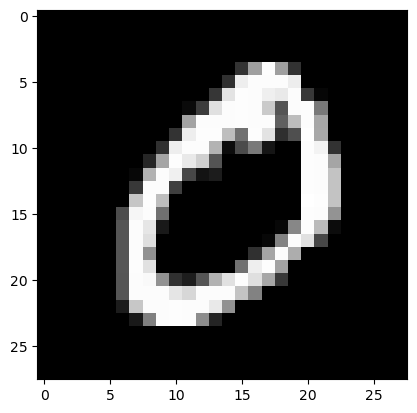

In [53]:
plt.imshow(digit[0], cmap ='gray')
plt.show()

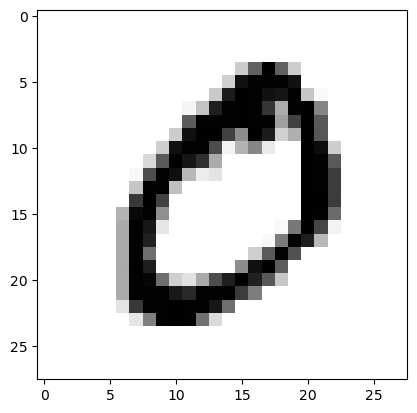

In [54]:
plt.imshow(digit[0], cmap ='gray_r')
plt.show()

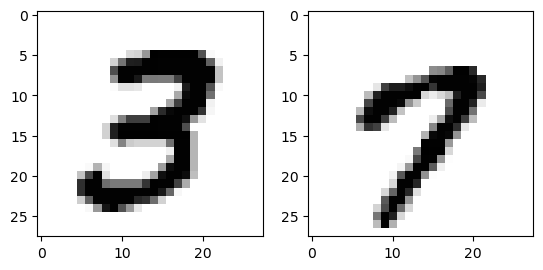

In [55]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(data_three[0], cmap = 'gray_r')
axs[1].imshow(data_seven[0], cmap = 'gray_r')

### K-Means를 이용한 Mnist 데이터 셋 Clustering

In [56]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [57]:
digit.shape # (3차원 데이터) => 2차원으로 변경해서 머신러닝 알고리즘에 주입

(18319, 28, 28)

In [58]:
# 3차원 -> 2차원
digit_fin= digit.reshape(-1, 28*28)
digit_fin.shape

(18319, 784)

In [59]:
# KMeans 객체 생성하고 군집화 수행
# 데이터가 3개의 수치이므로 3개의 그룹으로 군집화 진행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)

In [60]:
kmeans.fit(digit_fin)

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [61]:
# labels_ 속성을 통해 각 데이터별로 할당된 군집 확인
print(kmeans.labels_)

[0 0 2 ... 1 1 1]


In [62]:
tmp = pd.DataFrame({'target' : digit_y, 'cluster' : kmeans.labels_})

In [63]:
# target 값이 0번인(0번 손글씨) 데이터에 대해서 군집 번호별 분류
tmp[tmp['target'] == 0]['cluster'].value_counts()

cluster
0    5345
2     455
1     123
Name: count, dtype: int64

In [64]:
tmp[tmp['target'] == 3]['cluster'].value_counts()

cluster
2    5735
1     322
0      74
Name: count, dtype: int64

In [65]:
tmp[tmp['target'] == 7]['cluster'].value_counts()

cluster
1    6140
2      89
0      36
Name: count, dtype: int64

## kmeans 군집화 이해
- 현재 데이터의 피처를 활용
- 현 이미지를 예로 들면 이미지 한개당 피처는 0-255 사이의 값들이 여러개 존재
    - 각 이미지의 피처 값들의 평균을 내고 평균값이 비슷한 것들끼리 묶는다?

#### 픽셀값 분석하기
- 각 이미지의 픽셀값의 평균을 내려면 차원이 줄어야 함
    - width * height 로 되어있는 차원을 일차원으로 변경해서 각 이미지의 픽셀 평균

In [67]:
28 * 28

784

In [68]:
zero = data_one.reshape(-1, 28*28)
zero.shape

(5923, 784)

In [69]:
three = data_three.reshape(-1, 28*28)
three.shape

(6131, 784)

In [71]:
seven = data_seven.reshape(-1, 28*28)
seven.shape

(6265, 784)

In [72]:
import pandas as pd
test_df = pd.DataFrame(zero)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test_df.mean(axis = 1) # 5923개의 손글씨 0의 이미지 샘플들의 각 평균

0       39.661990
1       45.195153
2       46.565051
3       47.533163
4       58.090561
          ...    
5918    36.849490
5919    30.084184
5920    39.562500
5921    45.062500
5922    44.422194
Length: 5923, dtype: float64

In [77]:
print(zero.mean(axis = 1))

[39.6619898  45.19515306 46.56505102 ... 39.5625     45.0625
 44.42219388]


In [78]:
print(three.mean(axis = 1))

[45.74872449 36.41326531 45.61352041 ... 40.73214286 32.61862245
 34.80229592]


In [79]:
print(seven.mean(axis = 1))

[32.26530612 20.08290816 27.98596939 ... 34.32653061 21.4744898
 33.15178571]


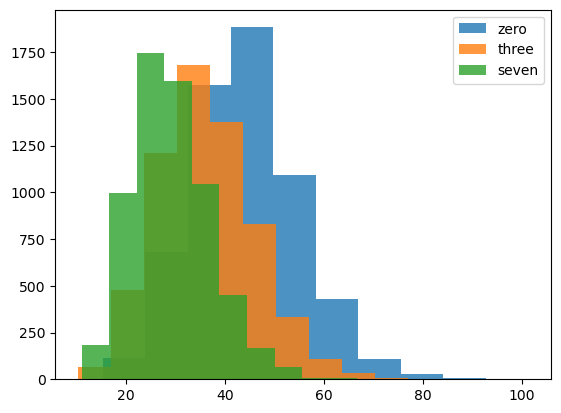

In [82]:
# 세개의 숫자 이미지에 대한 샘플 하나의 픽셀평균의 분포 확인
# 히스토그램이용
plt.hist(zero.mean(axis = 1), alpha = 0.8)
plt.hist(three.mean(axis = 1), alpha = 0.8)
plt.hist(seven.mean(axis = 1), alpha = 0.8)
plt.legend(['zero', 'three', 'seven'])
plt.show()

#### 히스토그램 분석
- 각 이미지 픽셀 평균의 분포 차이는 있는 것 같지만 세 이미지 모두 중복 부분이 많아 구분이 어려워 보임
- 각 이미지별 픽셀의 평균대신 특성의 평균을 사용해보자?
    - 784개의 특성이 있음. 같은 특성들끼리의 평균

In [83]:
test_df.head() # 손글씨 0 샘플의 데이터

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test_df.mean(axis = 0)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

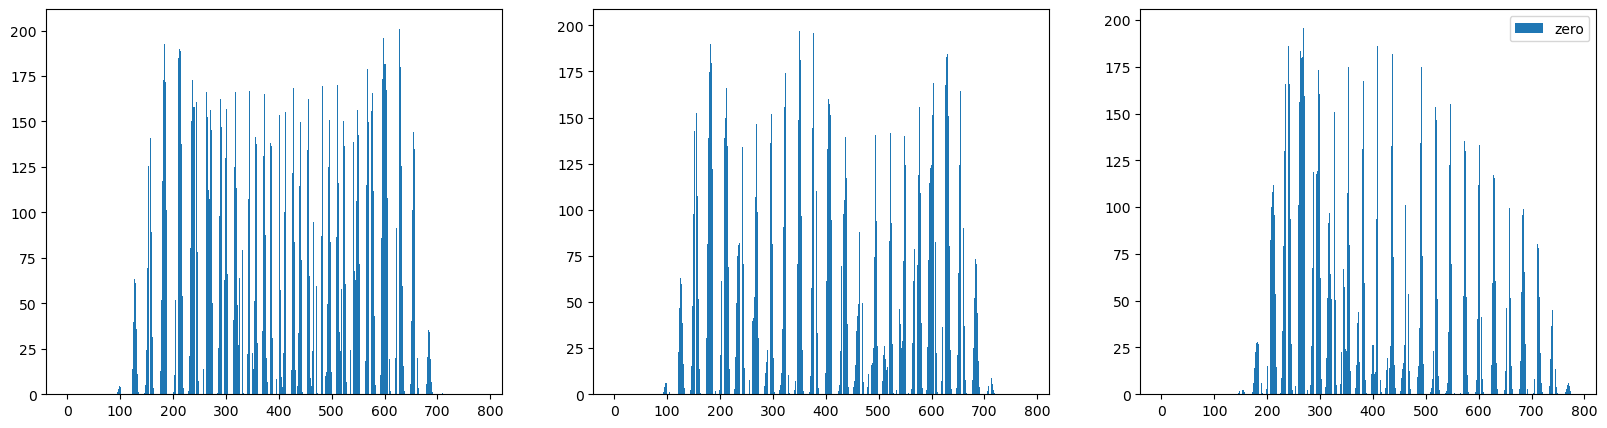

In [85]:
# 각 숫자별 특성의 평균을 이용해 bar 그래프 그리기
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].bar(range(784), zero.mean(axis = 0))
axs[1].bar(range(784), three.mean(axis = 0))
axs[2].bar(range(784), seven.mean(axis = 0))
plt.legend(['zero', 'three', 'seven'])
plt.show()

### 그래프 설명
- 0은 전반적으로 그래프가 고르게 분포됨
- 3은 값이 올라가는 부분이 3구역으로 보임
- 7은 앞쪽픽셀의 값이 더 높고 뒷쪽픽셀로 갈 수록 값이 작아보임
- 특성의 평균 그래프가 이미지의 평균 그래프보다 구분이 쉽기때문에 특성의 평균을 선택

In [90]:
# 특성들의 평균값을 이용해 중심점 이미지(data)로 결정
zero_mean = np.mean(zero, axis = 0).reshape(28, 28)
three_mean = np.mean(three, axis = 0).reshape(28, 28)
seven_mean = np.mean(seven, axis = 0).reshape(28, 28)

In [87]:
zero_mean.shape

(28, 28)

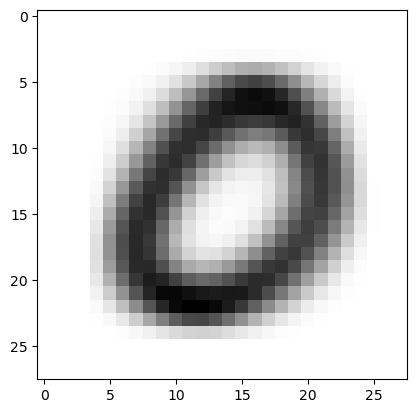

In [88]:
plt.imshow(zero_mean, cmap = 'gray_r')

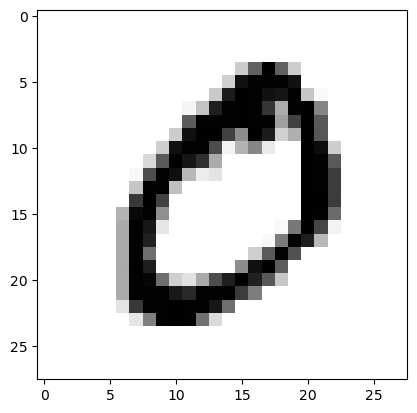

In [92]:
plt.imshow(digit[0], cmap = 'gray_r')

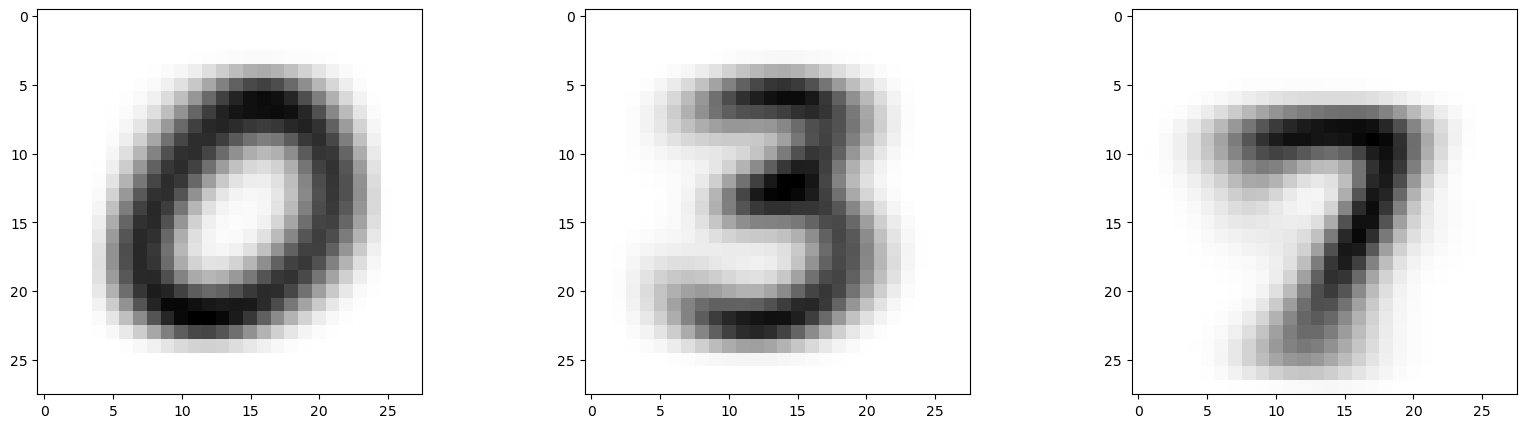

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(zero_mean, cmap = 'gray_r')
axs[1].imshow(three_mean, cmap = 'gray_r')
axs[2].imshow(seven_mean, cmap = 'gray_r')
plt.show()

### 대표이미지(특성의 평균으로 계산된)와 가까운 이미지 선택
- 거리 계산 후 군집 분류

In [106]:
# 모든 숫자 이미지와 손글씨 0 평균 이미지와의 차이(거리)계산(픽셀별 계산)
# zero_mean : 군집 중심점 0
abs_diff = np.abs(digit - zero_mean)

In [107]:
abs_diff[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16106703e-02,
        4.27148405e-02, 1.75586696e-02, 0.00000000e+00, 1.51950025e-02,
        4.15330069e-02, 1.97535033e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [108]:
np.mean(abs_diff[0])

28.246221922839705

In [109]:
np.mean(abs_diff[10000])

46.765322704296985

In [110]:
# abs_dff (0숫자 평균(중심점)과의 차이 이미지)의 평균을 구함(각 이미지별 평균(행평균))
abs_mean = np.mean(abs_diff, axis = (1, 2))

In [111]:
print(abs_mean) # 0손글씨 대표이미지와의 차이 평균
# 이 결과에서 정렬 후 차이가 적게 나는 100개의 이미지 인덱스를 확인

[28.24622192 31.35289618 40.21644954 ... 47.29542673 42.89884362
 49.01409069]


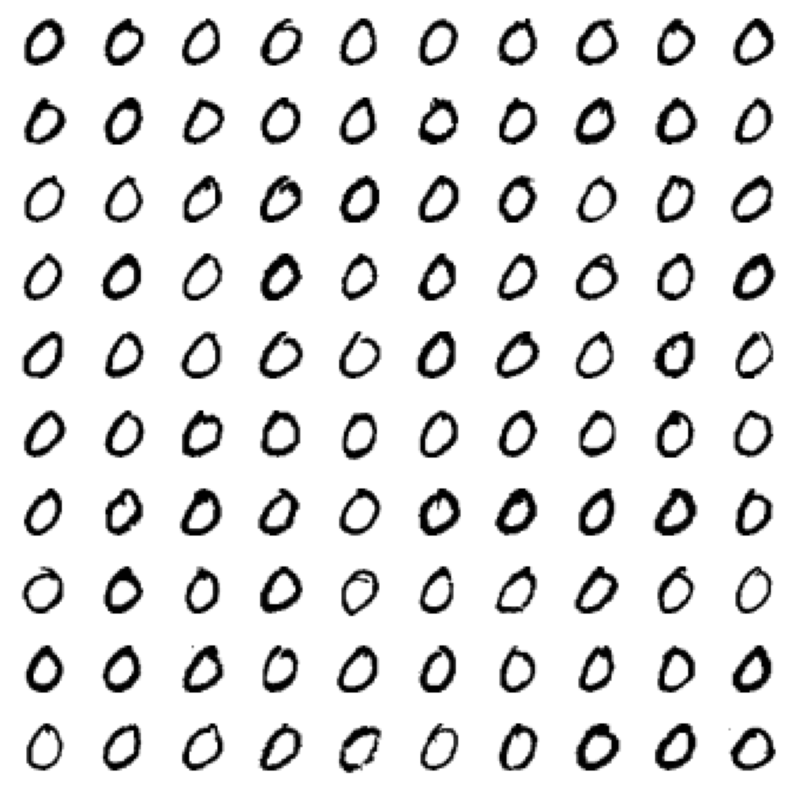

In [112]:
# 0과 평균거리가 가까운 100개 이미지의 인덱스
# 오름차순 정렬 후 해당 index 반환
# 손글씨 0은 5923개 이므로 손글씨 0의 중심점과의 차이값 데이터를 오름차순 정렬한 후 5923개의 이미지 인덱스를 추출
zero_index = np.argsort(abs_mean)[:5923]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(digit[zero_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off')
plt.show()

## 개인 실습
- 3과 7 대표 이미지에 대해서도 차이(거리)계산 후 
- 3 대표이미지와 가까운 이미지 출력
- 7 대표 이미지와 가까운 이미지 출력

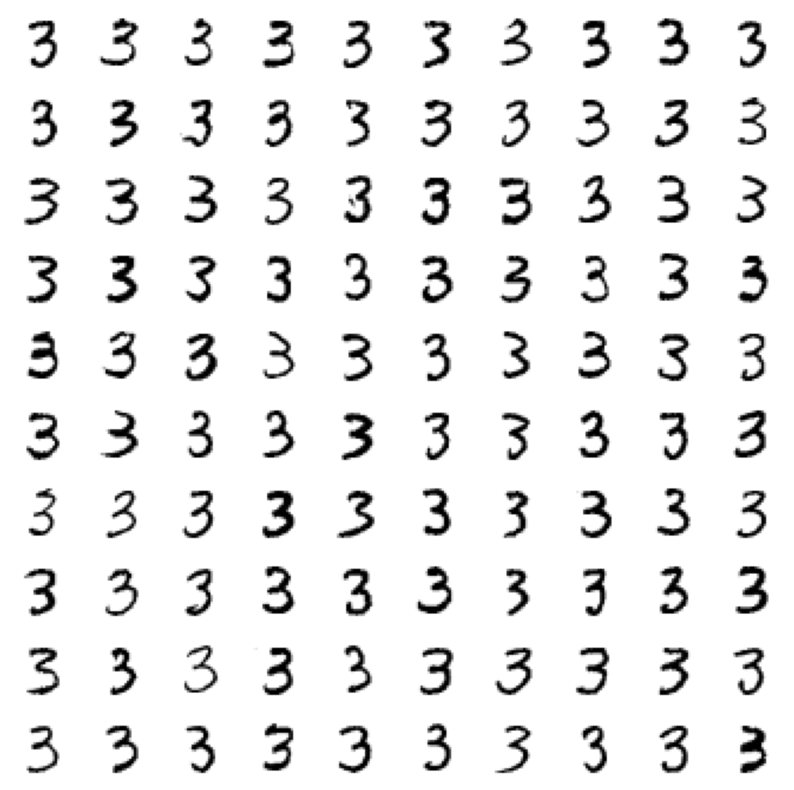

In [116]:
abs_diff = np.abs(digit - three_mean)
abs_mean = np.mean(abs_diff, axis = (1, 2))
three_index = np.argsort(abs_mean)[:5923]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(digit[three_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off')
plt.show()

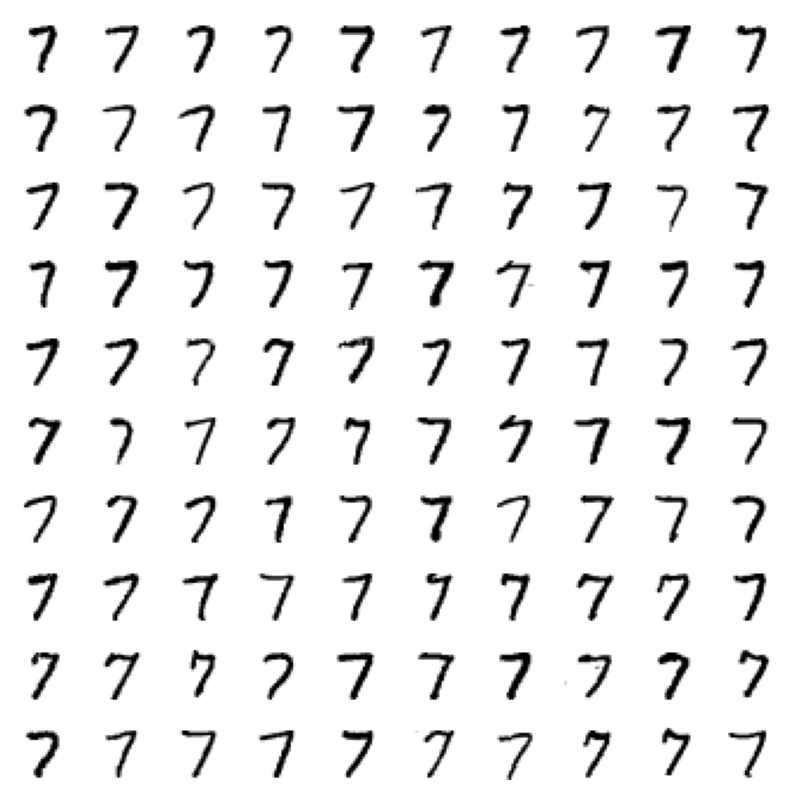

In [117]:
abs_diff = np.abs(digit - seven_mean)
abs_mean = np.mean(abs_diff, axis = (1, 2))
seven_index = np.argsort(abs_mean)[:5923]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(digit[seven_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off')
plt.show()